## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [35]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi


/bin/sh: nvidia-smi: command not found


In [36]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [37]:
train, test = keras.datasets.cifar10.load_data()

In [38]:
## 資料前處理
"""
Your code here
"""
from sklearn import preprocessing

def preproc_x(x, flatten=True):
    
    if flatten:
        x = x.reshape((len(x), -1))
        min_max_scaler = preprocessing.MinMaxScaler()
        x = min_max_scaler.fit_transform(x)
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y


In [39]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

/Users/daihongming/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/daihongming/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [40]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
    
model = build_mlp(input_shape=x_train.shape[1:])

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [42]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [43]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [44]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 146us/step - loss: 2.0032 - acc: 0.2575 - val_loss: 1.8345 - val_acc: 0.3333
Epoch 2/100
50000/50000 [==============================] - 6s 125us/step - loss: 1.7631 - acc: 0.3629 - val_loss: 1.7668 - val_acc: 0.3505
Epoch 3/100
50000/50000 [==============================] - 7s 137us/step - loss: 1.6719 - acc: 0.3960 - val_loss: 1.5983 - val_acc: 0.4189
Epoch 4/100
50000/50000 [==============================] - 7s 133us/step - loss: 1.5959 - acc: 0.4250 - val_loss: 1.5475 - val_acc: 0.4432
Epoch 5/100
50000/50000 [==============================] - 6s 129us/step - loss: 1.5434 - acc: 0.4456 - val_loss: 1.5420 - val_acc: 0.4493
Epoch 6/100
50000/50000 [==============================] - 6s 129us/step - loss: 1.5001 - acc: 0.4611 - val_loss: 1.4776 - val_acc: 0.4696
Epoch 7/100
50000/50000 [==============================] - 6s 130us/step - loss: 1.4595 - acc: 0.4746 - val_loss: 1.

50000/50000 [==============================] - 7s 134us/step - loss: 0.5655 - acc: 0.7975 - val_loss: 1.9627 - val_acc: 0.5033
Epoch 60/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.5636 - acc: 0.7975 - val_loss: 2.0369 - val_acc: 0.5116
Epoch 61/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.5466 - acc: 0.8030 - val_loss: 2.0712 - val_acc: 0.5003
Epoch 62/100
50000/50000 [==============================] - 6s 124us/step - loss: 0.5534 - acc: 0.7999 - val_loss: 2.0986 - val_acc: 0.5092
Epoch 63/100
50000/50000 [==============================] - 6s 124us/step - loss: 0.5342 - acc: 0.8075 - val_loss: 2.1542 - val_acc: 0.5020
Epoch 64/100
50000/50000 [==============================] - 6s 126us/step - loss: 0.5220 - acc: 0.8140 - val_loss: 2.1479 - val_acc: 0.5001
Epoch 65/100
50000/50000 [==============================] - 6s 125us/step - loss: 0.5232 - acc: 0.8112 - val_loss: 2.1931 - val_acc: 0.5033
Epoch 66/100
50000/50000 [=======

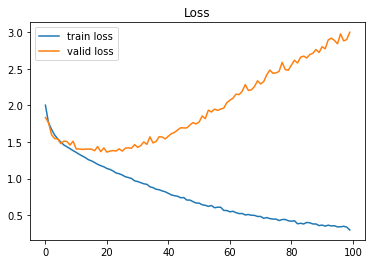

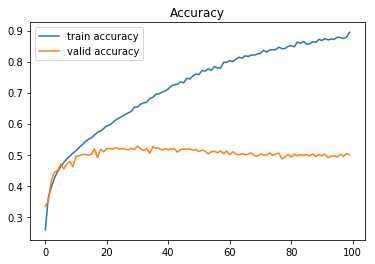

In [45]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()